## Université de Bordeaux,  Master Mention Informatique

## Intelligence Artificielle

### Deep Learning, feuille 1

### Présentation

Le but de ce premier TD est de vous familiariser avec les réseaux de neurones et leur entraînement. Nous allons passer en revue les éléments de base suivant :

 - données d'apprentissage, 
 
 - fonction de perte (loss function)
 
 - descente de gradient
 
 Pour cela, nous allons utiliser un réseau de neurone (composé d'un seul neurone en fait) pour deux tâches : 
 
  - une régression linéaire simple
  
  - une régression logistique.

Commençons par importer quelques unes des bibliothèques usuelles :

In [228]:
import numpy as np
import random as rd
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.simplefilter('ignore')

### On génère les données 

Afin de réaliser une régression linéaire simple, nous allongs générer un nuage de points. Exécutez le code de la cellule suivante :

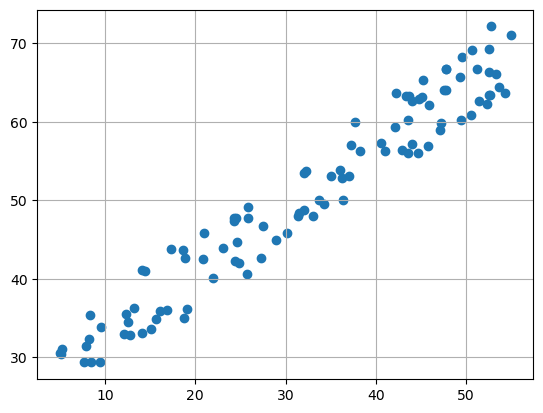

In [239]:
#Data: 
def generate(m, sizeNoise, slope, intersect):    
    x = [rd.random()*50 + 5 for i in range(m)]
    noise = [rd.random() * sizeNoise for i in range(m)]#np.rand(m,1) * sizeNoise
    y = [intersect + slope*x[i] + noise[i] for i in range(m)] 
    return np.array([x]), np.array([y])

m = 100
sizeNoise = 10
a = 0.8
b =  20
    
X, Y = generate(m, sizeNoise, a, b)
plt.grid()
plt.scatter(X, Y)

### Exercice 1. Un neurone :

Comme vu en cours, un neurone formel est représenté comme suit : 

![Un neurone formel (Mc Culloch & Pitts (1943))](img/formal_neuron_s.png)

1. Nommez chacun des élements du neurone.

2. Ecrivez une fonction <code>neuron(x, w, b, f)</code> permettant d'implémenter ce neurone

In [240]:
def neuron(x, w, b, f):
    weighted_sum = np.dot(w, x) + b
    output = f(weighted_sum)
    return output

Dans un réseau de neurones, il y a différentes couches ("layers") : une couche d'entrée où l'on passe les paramètres d'entrée, la couche de sortie qui affiche le résultat, et les couches cachées qui effectuent des opérations sur les données. Chaque couche est composée de nœuds qui ont un poids ("weight"). Les différentes couches sont connectées de telle sorte que chaque neurone de la couche n-1 est relié à chaque neurone de la couche n. Chaque neurone possède également un biais.
le neurones s'active en fonction de la fonction d'activation, l'erreur entre le label et le le poid du neurone et calculer par une fonction cout.

3. Définissez deux fonctions <code>id</code> et <code>sigmoid</code> définies par :
$$
id(z) = z \mbox{ et } sigmoid(z) = \frac{1}{1+ e^{-z}}.
$$

In [241]:
import numpy as np

def sigmoid(x):
    return 1 / (1 + e**-x)
def id(x):
    return x


4. Testez vos fonctions. L'exécution de la cellule suivante devrait donner le résultat affiché.

In [242]:
x = np.array([[1, 2, 3]])
y = np.array([1, 0, 1])

w = np.array([1])
b = [1]
y_hat = neuron(x, w, b, id)
print('x: ', x)
print('y_hat: ', y_hat)

x:  [[1 2 3]]
y_hat:  [2 3 4]


### Exercice 2. Régression linéaire : 

Dans cet exercice, nous allons entraîner un neurone pour réaliser une régression linéaire simple. 

1. Dessiner le neurone qui sera utilisé. Identifiez bien les paramètres à trouver.

Il suffit de prendre $p=1$ et $f=id$ dans le neurone formel de la figure ci-dessus. 

Les paramètres à trouver sont $w$ et $b$. Ils correspondent respectivement à $\beta_1$ et $\beta_0$ dans l'expression de la régression linéaire simple (voir votre cours de ACID). 

1. Ecrivez le code de la fonction <code>loss(y, y_hat)</code> définie comme la moyenne des carrés des écarts : 

$$
loss\left(y, \hat{y}\right) = \frac 1 {n} \sum_{i=1}^n \left(\hat{y_i} - y_i)\right)^2. 
$$

In [243]:
def loss(y, y_hat):
    return np.mean((y_hat - y)**2)


2. Calculez le gradient de la fonction ${\cal L} = loss$ par rapport aux deux variables $w$ et $b$.

In [244]:
print(loss(y,y_hat))

6.333333333333333


3. Ecrivez la focntion <code>gradient(x, y_hat, y)</code> retournant le gradient de la fonction $\cal L$.

In [245]:
def gradient(x, y_hat, y):
    return np.mean(x*(y_hat - y)), np.mean(y_hat - y)


4. Ecrivez une fonction <code>train(x, y, nu, epochs)</code> qui réalise une déscente du gradient de la fonction $\cal L$ afin de trouver les paramètres $w$ et $b$ minimisant la valeur de $\cal L$. 

In [246]:
def train(x, y, nu, epochs, w, b):
    for i in range (epochs) :
        y_hat = neuron(x,w,b,id)
        l = loss(y, y_hat)
        dw, db = gradient(x, y_hat, y)
        w = w - nu* dw
        b = b - nu* db
        if( i % 1000 == 0):
            print("i : ,loss:",i,l)
    return w,b

5. Entraînez votre neurone. Prenez $0.001$ comme valeur pour le pas d'apprentissage, et 10000 pour le nombre d'epochs.

In [247]:
import numpy as np

# Paramètres d'entraînement
learning_rate = 0.001
num_epochs = 10000
# Entraînement du neurone
trained_w, trained_b = train(X,Y,learning_rate,num_epochs,w,b)

i : ,loss: 0 318.33285527972976
i : ,loss: 1000 81.49435010022098
i : ,loss: 2000 59.68950324924509
i : ,loss: 3000 44.410857919160556
i : ,loss: 4000 33.70511874484164
i : ,loss: 5000 26.2036126366485
i : ,loss: 6000 20.947311042243104
i : ,loss: 7000 17.264223132580344
i : ,loss: 8000 14.683485268386569
i : ,loss: 9000 12.875163532103684


6. Donnez l'équation de la droite de régression obtenue. Ecrivez l'instruction permettant de calculer les valeurs prédites.

In [248]:
# Équation de la droite de régression
equation = f'y = {trained_w[0]} * x + {trained_b[0]}'
print('Équation de la droite de régression:', equation)
y_pred = trained_w * X + trained_b

Équation de la droite de régression: y = 0.8909106755869649 * x + 21.099809490819542


7. Dessinez la droite de régression sur la même figure que le nuage de point.

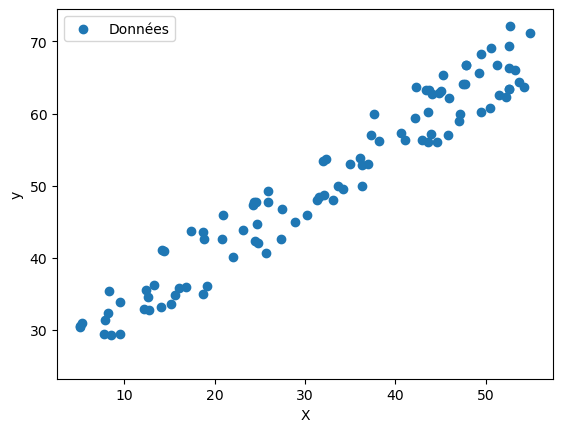

In [249]:
plt.scatter(X, Y, label='Données')  # Nuage de points
plt.plot(X, y_pred, color='red')  # Régression linéaire avec l'implémentation du neurone
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

8. Comparez le résultat obtenu avec la droite donnée par <code>linregress</code> du sous module <code>stats</code> du module <code>scipy</code>.

In [226]:
from scipy.stats import linregress

In [227]:
slope, intercept, r_value, p_value, std_err = linregress(X.flatten(), Y.flatten())

equation_droite_scipy = f'y = {slope:.2f}x + {intercept:.2f}'
print("Équation de la droite de régression (scipy):", equation_droite_scipy)

Équation de la droite de régression (scipy): y = 0.79x + 25.53


### Exercice 3. Régression logistique :

Dans cet exercice, nous allons transformer le neurone afin de l'utiliser pour réaliser une classification. Nous allons nous limiter à une classification bianire : les élements appartiennent soit à une classe 0 soit à une classe 1.  

1. Comment devons-nous appeler la "fonction" <code>neuron</code> pour que le fonction d'activation soit la sigmoid ?

In [68]:
def sigmoid(x):
    return 1 / (1 + e**-x)

x:  [[1 2 3]]
y_hat:  [0.88079708 0.95257413 0.98201379]


2. Exécutez la cellule suivante pour générer les données, les découper en deux parties train et test, etc. Observez le résultat de la cellule.

In [69]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

X, y = make_classification(n_samples=1000, n_features=1, n_classes=2, 
                           n_informative=1, n_redundant=0, n_repeated=0,
                          n_clusters_per_class=1)

X_train, X_test, y_train, y_test = train_test_split(X, y)
print(X_train.shape)
print(y_train.shape)
print(np.unique(y))

(750, 1)
(750,)
[0 1]


3. Définissez la nouvelle fonction de perte. Nous allons utiliser la fonction *cross_entropy* vue en cours :

$$
\cal L = -\frac 1 n \sum_{i=1} y_i\times \log\left(\hat{y}_i\right) 
$$

4. Ecrivez les expressions mathématiques de ce que calcule votre neurone.

5. Calculez le gradient de $\cal L$ et écrivez la fonction correspondante

6. Adaptez une fonction <code>train(x, y, nu, epochs)</code> pour réaliser une déscente du gradient de la fonction $\cal L$ afin de trouver les paramètres $w$ et $b$ minimisant la valeur de $\cal L$. 

7. Exécutez la cellule suivante pour que vos calculs matriciels puissent se faire et entraînez votre neurone.

In [ ]:
X_train = np.reshape(X_train, (X_train.shape[1], X_train.shape[0]))
print(X_train.shape)
print(y_train.shape)


8. Evaluez votre modèle. Pour cela : 

8.1. Exécutez la cellule suivante pour formater les données de test.

In [75]:
X_test = np.reshape(X_test, (X_test.shape[1], X_test.shape[0]))

8.2. Appliquez votre neurone aux données de test et observez le résultat obtenu.

8.3. Transformez les sorties en 0 et 1 : 

8.4. Evaluez la qualité du modèle obtenu 